<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/AltDiffusion_m9_multilingual_CLIP_model_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AltDiffusion-m9 Demo
AltDiffusion-m9 performs well in aligning Chinese and English, and is the strongest open source version on the market today, retaining most of the stable diffusion capabilities of the original, and in some cases even better than the original model.

AltDiffusion-m9 model is backed by a multilingual CLIP model named AltCLIP-m9, which is also accessible in FlagAI. You can read this tutorial for more information.

| Description | Link |
| ----------- | ---- |
| 🎉 Original Repository | [![GitHub Repository](https://img.shields.io/github/stars/flagai-open/flagai?style=social)](https://github.com/flagai-open/flagai) |
| 📙 Original Colab | [![PyTTI-Tools:FILM](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1htPovT5YNutl2i31mIYrOzlIgGLm06IX#scrollTo=0KXFRkjG1RVk) |
| 🚀 Online inference | [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/BAAI/AltDiffusion) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Colab-resources/) |


In [1]:
!pip install git+https://github.com/huggingface/diffusers.git torch transformers sentencepiece accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-113nr0vd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-113nr0vd
  Resolved https://github.com/huggingface/diffusers.git to commit 4f14b363297cf8deac3e88a3bf31f59880ac8a96
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.8 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.17.0.dev0-py3-none-any.whl size=1072194 sha256=b726671d45aed31b7426812e071


2.   run


when running in the colab, models need to be downloaded which may need some time

if CUDA not avaliable you should close half

In [2]:
from diffusers import AltDiffusionPipeline, DPMSolverMultistepScheduler
import torch

if torch.cuda.is_available():
  pipe = AltDiffusionPipeline.from_pretrained("BAAI/AltDiffusion-m9", torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
else:
  pipe = AltDiffusionPipeline.from_pretrained("BAAI/AltDiffusion-m9")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/alt_diffusion/pipeline_alt_diffusion.py:164: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the conf

In [4]:
prompts = {
    "En": "a person, highly detailed, d & d, fantasy, highly detailed, digital painting, trending on artstation, concept art, sharp focus, illustration, art by artgerm and greg rutkowski and fuji choko and viktoria gavrilenko and hoang lap",
    "Zh": "人物、高度详细、D&D、幻想、高度详细、数码绘画、在ArtStation上流行、概念艺术、清晰聚焦、插画、艺术家：Artgerm、Greg Rutkowski、Fuji Choko、Viktoria Gavrilenko和Hoang Lap",
    "Es": "una persona, altamente detallada, d & d, fantasía, altamente detallada, pintura digital, tendencia en artstation, arte conceptual, enfoque nítido, ilustración, arte de artgerm y greg rutkowski y fuji choko y viktoria gavrilenko y hoang lap",
    "Fr": "une personne, très détaillée, d & d, fantasy, très détaillée, peinture numérique, tendance sur artstation, art conceptuel, mise au point nette, illustration, art par artgerm et greg rutkowski et fuji choko et viktoria gavrilenko et hoang lap",
    "Ru": "человек, высоко детализированный, d & d, фантазия, высоко детализированный, цифровая живопись, популярное на artstation, концептуальное искусство, четкое фокусирование, иллюстрация, работы artgerm, greg rutkowski, fuji choko, viktoria gavrilenko и hoang lap",
    "Ja": "人物、高い詳細度、D＆D、ファンタジー、高い詳細度、デジタルペインティング、artstationでトレンド、コンセプトアート、鮮明な焦点、イラスト、artgerm、greg rutkowski、fuji choko、viktoria gavrilenko、hoang lapの作品",
    "Ko": "인물, 상세하게 그려진, D&D, 판타지, 상세하게 그려진, 디지털 페인팅, artstation에서 트렌드, 컨셉 아트, 선명한 초점, 일러스트레이션, artgerm, greg rutkowski, fuji choko, viktoria gavrilenko, hoang lap 작품",
    "Ar": "شخص، تفصيل متقن، دي آند دي، خيال، تفصيل متقن، رسم رقمي، يحظى بشعبية على artstation، فن الأفكار، تركيز حاد، رسم توضيحي، فن من أعمال artgerm وgreg rutkowski وfuji choko وviktoria gavrilenko وhoang lap",
    "It": "una persona, altamente dettagliata, d & d, fantasy, altamente dettagliata, pittura digitale, trending su artstation, arte concettuale, focus nitido, illustrazione, arte di artgerm e greg rutkowski e fuji choko e viktoria gavrilenko e hoang lap"
}


  0%|          | 0/50 [00:00<?, ?it/s]

En


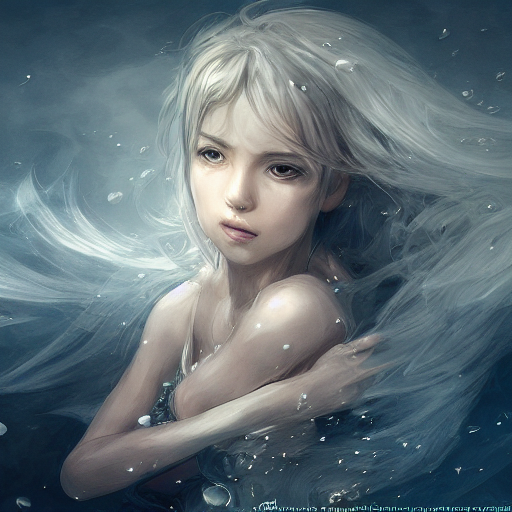

  0%|          | 0/50 [00:00<?, ?it/s]

Zh


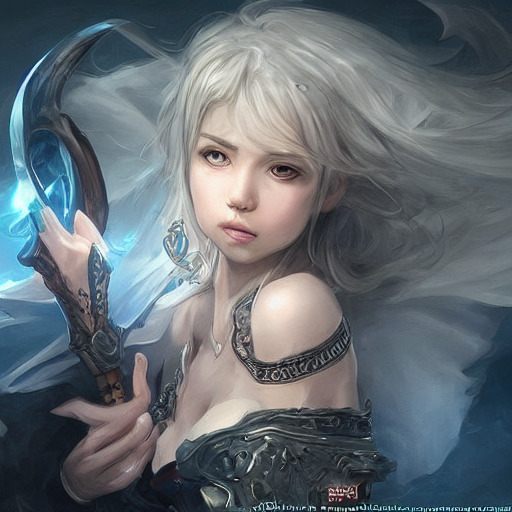

  0%|          | 0/50 [00:00<?, ?it/s]

Es


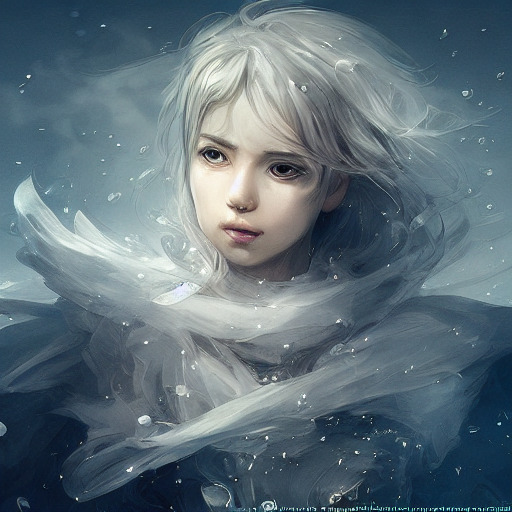

  0%|          | 0/50 [00:00<?, ?it/s]

Fr


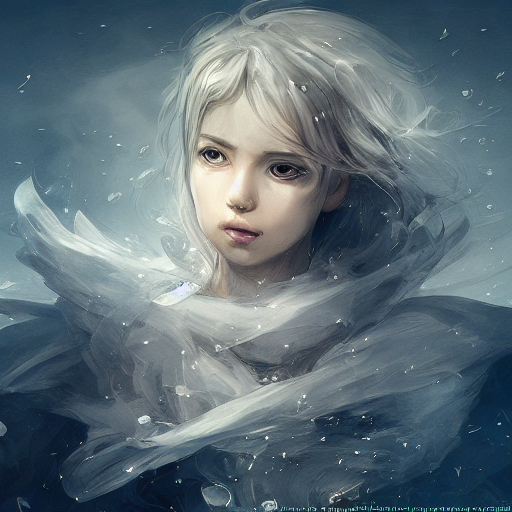

  0%|          | 0/50 [00:00<?, ?it/s]

Ru


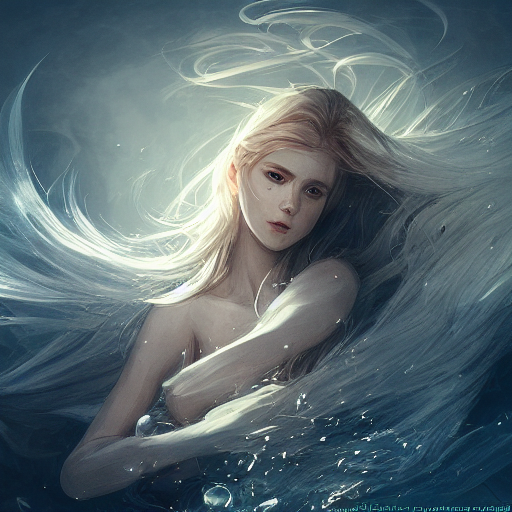

  0%|          | 0/50 [00:00<?, ?it/s]

Ja


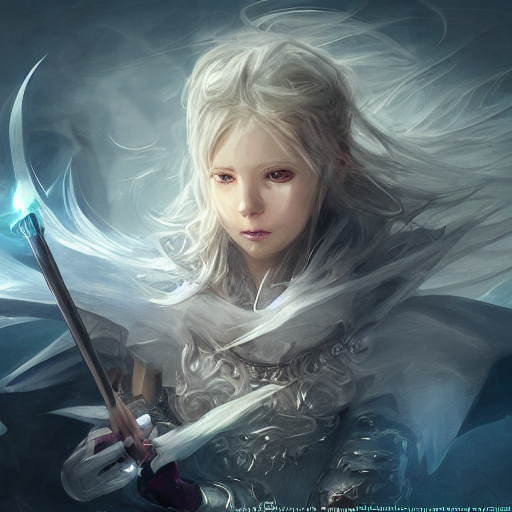

  0%|          | 0/50 [00:00<?, ?it/s]

Ko


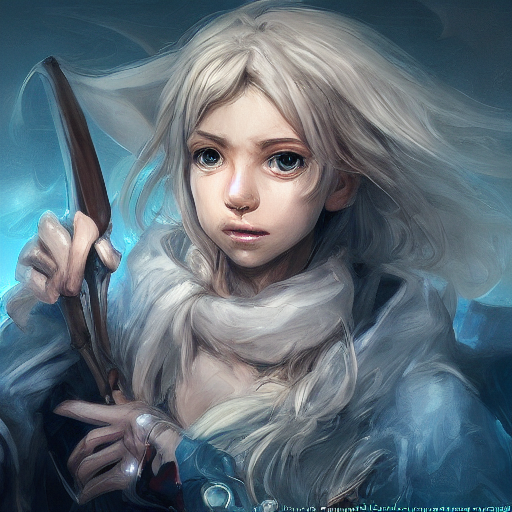

  0%|          | 0/50 [00:00<?, ?it/s]

Ar


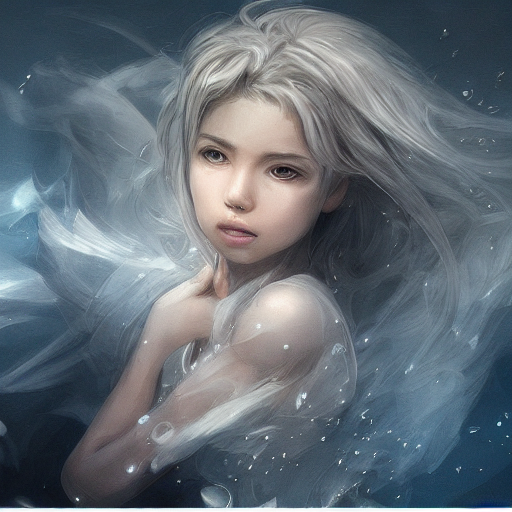

  0%|          | 0/50 [00:00<?, ?it/s]

It


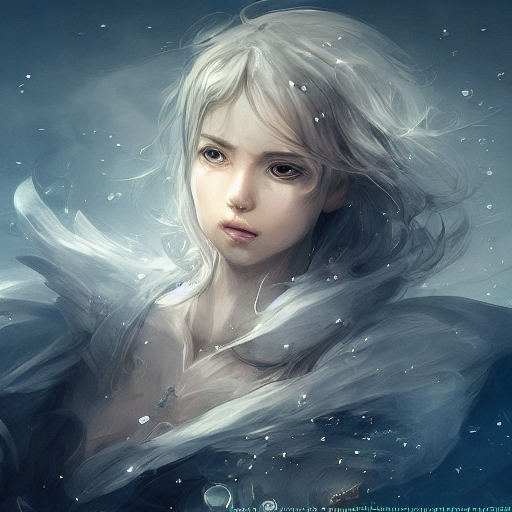

In [11]:
for key, prompt in prompts.items():
  
  image = pipe(prompt, num_inference_steps=50, generator=torch.manual_seed(11)).images[0]
  #image = Image.fromarray(image)
  
  print(key)
  image.show()